# Multiple Linear Regression
Bike Sharing Case Study

Problem Statement: A US bike-sharing provider BoomBikes is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. But BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.

Essentially, the company wants —

- To build a model for shared bikes with the available independent variables.
- The management should understand the model that how exactly the demands vary with different features and demand dynamics of a new market.
- To know the accuracy of the model, i.e. how well these variables can predict demand dynamics.

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the day dataset

In [882]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [883]:
import numpy as np
import pandas as pd

In [884]:
bike_data = pd.read_csv("day.csv")

In [885]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the day dataframe

In [886]:
#check the number of rows and columns in the dataframe
bike_data.shape

(730, 16)

In [887]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Luckily, no null values**

In [888]:
#analyse numerical data
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The columns: season, yr, mnth, holiday,workingday,weekday should not be numerical variables. We should convert them to categorical variables.

# Step 2: Visualising the Data
### Let's now spend some time doing the most important step - understanding the data.
If there is some obvious multicollinearity going on, we can detect here.

Here we will also identify: if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.



In [889]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables

**Univariate Analysis** **(cnt vs temp)**

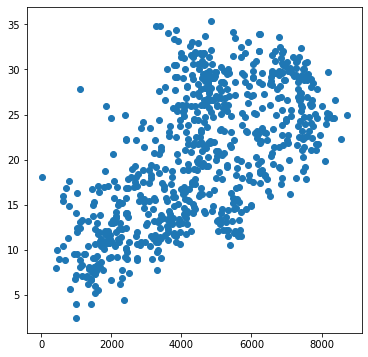

In [890]:
plt.figure(figsize=[6,6])
plt.scatter(bike_data.cnt, bike_data.temp)
plt.show()

Insight: We can see some linear relationship here.

Let's make a pairplot of all the numeric variables

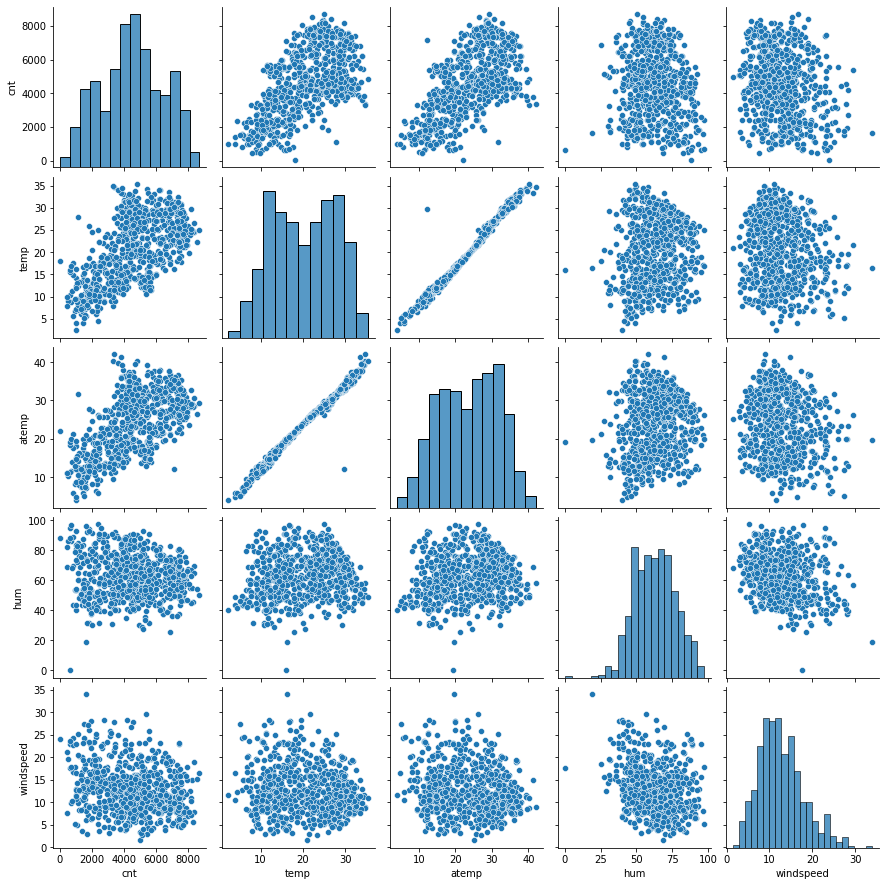

In [891]:
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Insight:- 

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

### Visualising Categorical Variables

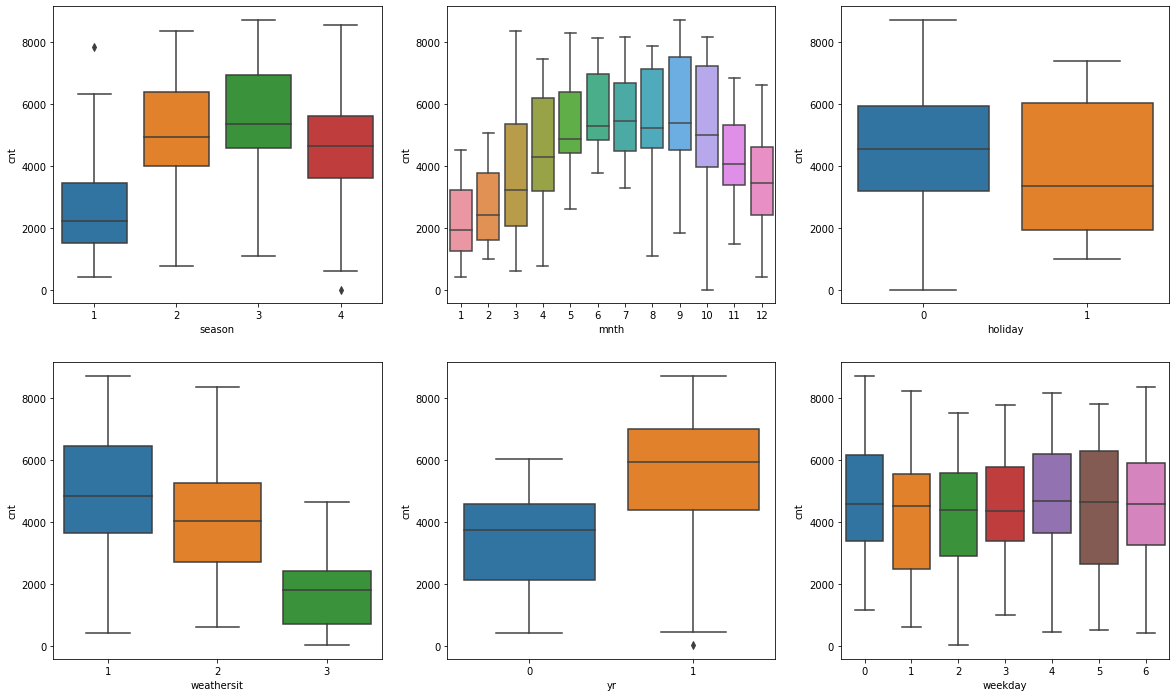

In [892]:
# Plot box plots for visualizing categorical variables
# boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)

plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)

plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data,)

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)

plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)

plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

# Step 3: Data Preparation
**As we can see temp and cnt has linear relation and we can apply linear regression here.**

Following variables can be removed from further analysis:

 - We don't need '**dteday**'. Since we already have seperate columns for 'year' & 'month',hence, we could delete 'dteday'.
 - column **instant** : Its only an index value.
 - **casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

**No string values like "Yes" or "No" here. So we can proceed further for dummy variables.**

In [893]:
# making a new dataset with useful variables only
bike_new = bike_data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [894]:
# Check the bike_data dataframe now
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Checking value_counts for columns which have o , 1 values only.

In [895]:
bike_new['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [896]:
bike_new['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

### Converting some numerical data to categorical data

In [897]:
import calendar
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

### Maping seasons

In [898]:
bike_new.season = bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

### Mapping weathersit

In [899]:
bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

### Maping weekday

In [900]:
bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

### Maping holiday

In [901]:
bike_new.holiday = bike_new.holiday.map({0:"No",1:"Yes"})

### Maping yr

In [902]:
bike_new.yr = bike_new.yr.map({0: "2018", 1:"2019"})

In [903]:
# Check the dataframe now
 
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


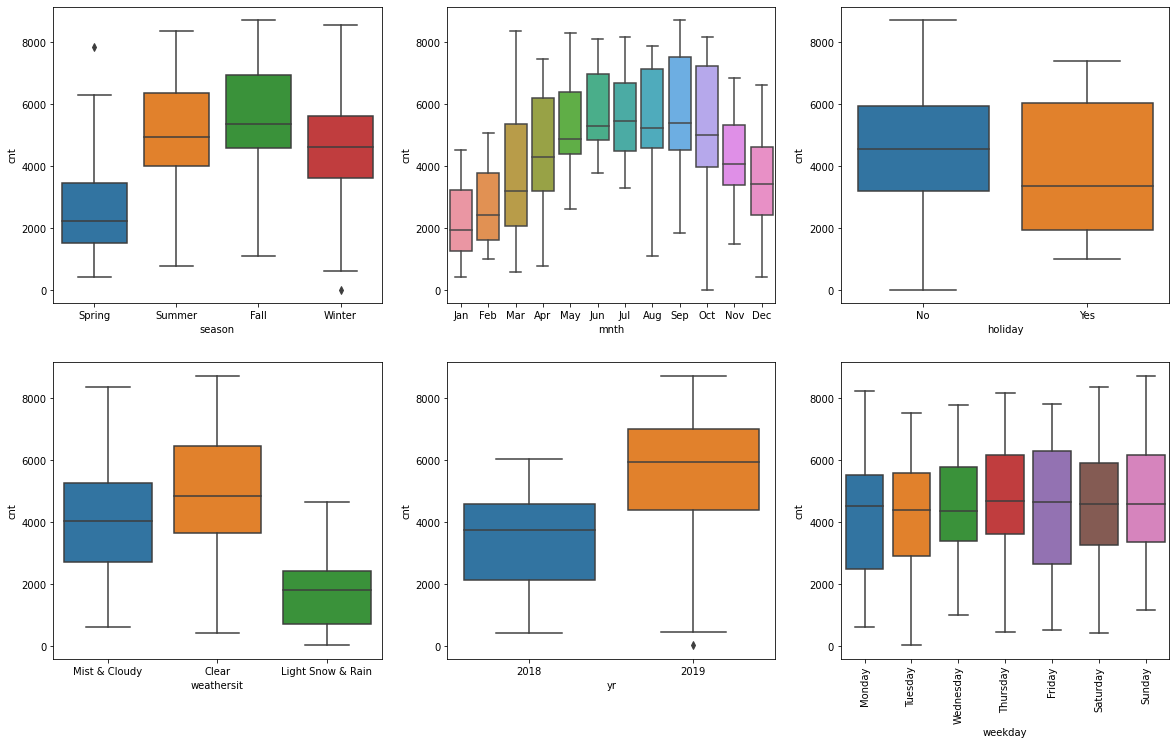

In [904]:
#Plotting box plot after mapping to write insights.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new,)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.xticks(rotation = 90)
plt.show()

Insights:- 

There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

- **Season:** Spring season(season 1) has least value of count as its median is very low as
compared to others and Fall(season 3) has maximum number of count. Rest of them:
Summer(season 2) and Winter(season 4) had an intermediate number of counts.
- **Weathersit**: There are no users when there is Heavy Rain/Snow(weathersit 4). That indicates
that this weather is extremely unfavourable. Highest count is for Clear weather(weathersit 1),
after that Mist & Cloudy(weathersit 2) has a greater number of counts. And last 
Light Snow & Rain(weathersit 3). 
- **Yr**: The number of rentals in 2019 (year 1) was more than 2018 (year 0).
- **Mnth:** July(mnth 7) has the highest number of rentals while January(mnth 1) has least. This
observation is the same as weathersit, January has usually heavy snowfall. Bike bookings were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor.
- **Holiday:** The median of count decreases during holidays but overall IQR range is
more during holidays.Mostly bike booking were happening when it is not a holiday
- **Weekday:**  weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.



### Dummy Variables

Creating dummy variables for season , mnth ,weathersit ,weekday

The variable season has 4 levels - 1: spring, 2: summer, 3: fall, 4: winter 

For this, we will use Dummy variables.

In [905]:
dummy = bike_new[['season','mnth','weekday','weathersit','yr','holiday']]

Now, we don't need four columns. We can drop the one column, as the type of one variable can be identified with just the last three columns for example:

- 000 will correspond to spring

- 010 will correspond to fall

- 100 will correspond to summer

- 001 will correspond to winter

In [906]:
dummy = pd.get_dummies(dummy,drop_first=True )

### Adding dummy variables to original dataset

In [907]:
bike_new= pd.concat([dummy,bike_new],axis = 1)

In [908]:
# Now let's see the head of our dataframe.
bike_new.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,Spring,2018,Jan,No,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring,2018,Jan,No,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Spring,2018,Jan,No,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Spring,2018,Jan,No,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Spring,2018,Jan,No,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [909]:
# Drop ['season','mnth','weekday','weathersit'] as we have created the dummies for it

bike_new.drop(['season','mnth','weekday','weathersit','yr','holiday'], axis = 1, inplace = True)

### Correlation Matrix

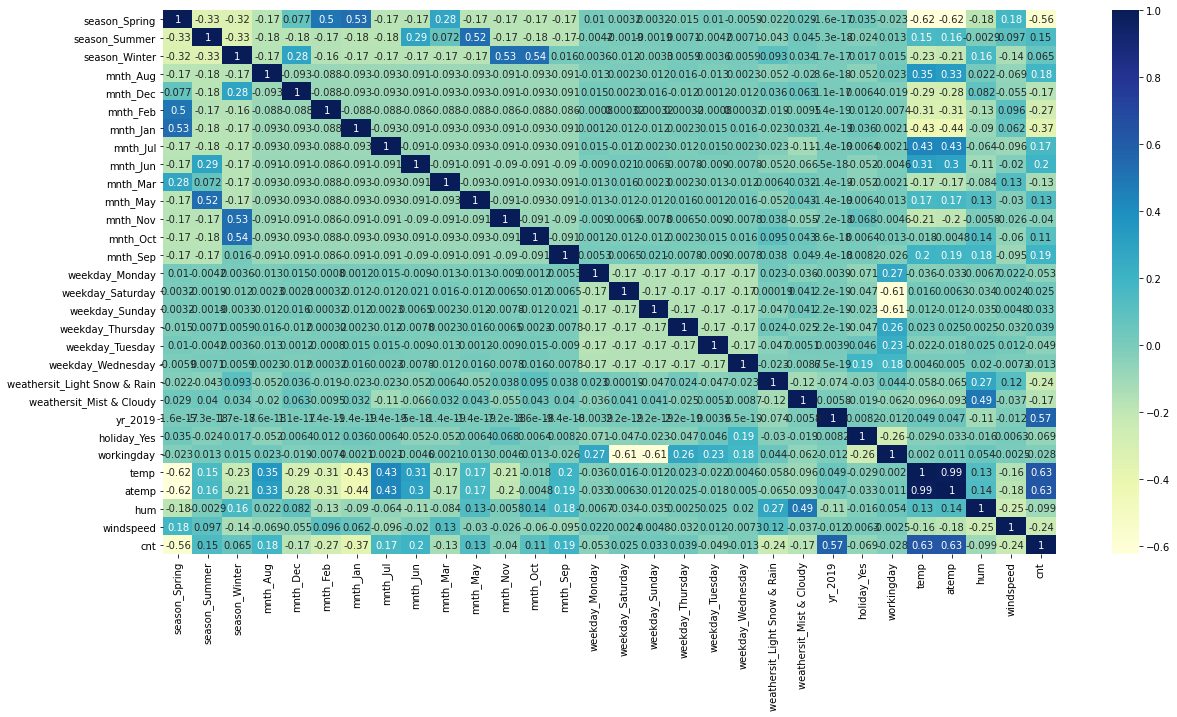

In [910]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

Insights:
- **temp** has high correltaion with **atemp**(fall)
- **cnt**(target variable) has correlation with **cnt**
- **cnt** has positive correlation with **yr_2019**

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.


In [911]:
# atemp and temp have high correlation 0.99. We must remove this
bike_new = bike_new.drop(['atemp'],1)

# Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [912]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 100)

In [913]:
#let's check shape of train and test data
print("shape of train data: ",bike_train.shape)
print("shape of test data: ", bike_test.shape)

shape of train data:  (510, 29)
shape of test data:  (220, 29)


### Rescaling the Features
We have to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)

I am using Standardisation scaling here.

In [914]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [915]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [916]:
# Using fit_transform on train dataset 
# Using transform on test dataset
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [917]:
# Checking numerical data
bike_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.507843,0.025490,0.711765,-2.746169e-16,-2.166023e-16,9.523972e-18,1.493359e-16
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.500429,0.157763,0.453386,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.381884e+00,-4.464419e+00,-1.891589e+00,-2.290356e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.756866e-01,-7.675694e-01,-7.174407e-01,-7.006211e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.285273e-02,2.219277e-02,-1.421889e-01,2.291863e-02
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,8.765214e-01,7.161828e-01,5.515521e-01,7.636488e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.050027e+00,2.398847e+00,4.003357e+00,2.169933e+00


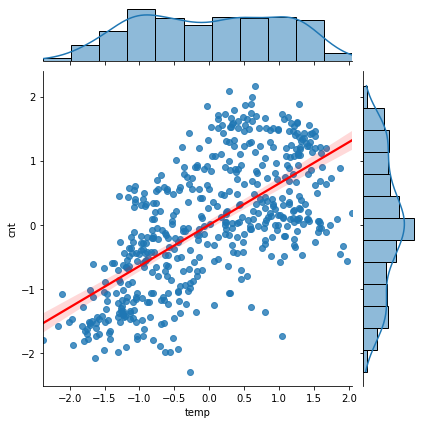

In [918]:
sns.jointplot(x="temp", y="cnt", data=bike_train, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})

So, we pick **temp** as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [919]:
y_train = bike_train.pop('cnt')
X_train = bike_train

# Step 5: Building a Linear model using RFE
Recursive feature elimination: Using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [920]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [921]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [922]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 8),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 5),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr_2019', True, 1),
 ('holiday_Yes', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1)]

In [923]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Tuesday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr_2019', 'holiday_Yes', 'workingday',
       'temp', 'windspeed'],
      dtype='object')

In [924]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Building Linear Model using 'STATS MODEL' 


###Model 1

In [925]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [926]:
def build_model(X,y):
    X_train_lm = sm.add_constant(X) #Adding the constant
    lr = sm.OLS(y,X_train_lm).fit() # fitting the model
    print(lr.summary())
    print(lr.params) # model summary
    return X_train_lm

In [927]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### VIF Check

In [928]:
build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     132.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          7.93e-183
Time:                        12:16:14   Log-Likelihood:                -249.47
No. Observations:                 510   AIC:                             540.9
Df Residuals:                     489   BIC:                             629.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,workingday,temp,windspeed
576,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.230870,-0.331282
426,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,-0.421238,-0.386359
728,1.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,-1.295618,2.017388
482,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,-0.628327,-0.780539
111,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,-0.849222,0.354275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.447165,-0.788409
53,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.483898,-1.235018
350,1.0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,-1.281812,0.653940
79,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.331400,1.232031


In [929]:
checkVIF(X_train_rfe)

,Features,VIF
17,workingday,10.46
0,season_Spring,7.24
2,season_Winter,4.83
18,temp,4.30
1,season_Summer,3.59
11,weekday_Sunday,2.67
10,weekday_Saturday,2.59
5,mnth_Jan,2.57
15,yr_2019,2.06
7,mnth_Nov,2.01



### Model 2
Removing the variable '**weekday_Sunday**' based on its high p-value (i.e 0.688).


In [930]:
X_train_new = X_train_rfe.drop(["weekday_Sunday"], axis = 1)

In [931]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     139.7
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          7.16e-184
Time:                        12:16:15   Log-Likelihood:                -249.56
No. Observations:                 510   AIC:                             539.1
Df Residuals:                     490   BIC:                             623.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Tuesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,workingday,temp,windspeed
576,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1.230870,-0.331282
426,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-0.421238,-0.386359
728,1.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,-1.295618,2.017388
482,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-0.628327,-0.780539
111,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.849222,0.354275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.447165,-0.788409
53,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-1.483898,-1.235018
350,1.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,-1.281812,0.653940
79,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.331400,1.232031


#### VIF Check

In [932]:
checkVIF(X_train_new)

,Features,VIF
16,workingday,5.08
0,season_Spring,4.99
2,season_Winter,3.44
17,temp,3.38
5,mnth_Jan,2.49
1,season_Summer,2.19
14,yr_2019,1.99
4,mnth_Feb,1.96
7,mnth_Nov,1.94
3,mnth_Dec,1.70


**VIF improved very much by deleting one variable.**

###Model 3
- Removing the variable '**weekday_Saturday**' based on its p-value (0.654).


In [933]:
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

In [934]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          6.42e-185
Time:                        12:16:15   Log-Likelihood:                -249.66
No. Observations:                 510   AIC:                             537.3
Df Residuals:                     491   BIC:                             617.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Monday,weekday_Tuesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,workingday,temp,windspeed
576,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1.230870,-0.331282
426,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-0.421238,-0.386359
728,1.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,-1.295618,2.017388
482,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,-0.628327,-0.780539
111,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.849222,0.354275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.447165,-0.788409
53,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-1.483898,-1.235018
350,1.0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,-1.281812,0.653940
79,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.331400,1.232031


#### VIF Check

In [935]:
checkVIF(X_train_new)

,Features,VIF
0,season_Spring,4.37
15,workingday,3.83
2,season_Winter,3.12
16,temp,3.11
5,mnth_Jan,2.48
13,yr_2019,1.98
4,mnth_Feb,1.96
7,mnth_Nov,1.90
1,season_Summer,1.83
3,mnth_Dec,1.68


### Model 4
- Removing the variable '**workingday**' based on its High p-value (0.253).

In [936]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [937]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     156.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          9.68e-186
Time:                        12:16:15   Log-Likelihood:                -250.34
No. Observations:                 510   AIC:                             536.7
Df Residuals:                     492   BIC:                             612.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Monday,weekday_Tuesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,temp,windspeed
576,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.230870,-0.331282
426,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.421238,-0.386359
728,1.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,-1.295618,2.017388
482,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.628327,-0.780539
111,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.849222,0.354275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.447165,-0.788409
53,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1.483898,-1.235018
350,1.0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,-1.281812,0.653940
79,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.331400,1.232031


#### VIF Check

In [938]:
checkVIF(X_train_new)

,Features,VIF
0,season_Spring,3.89
15,temp,2.89
2,season_Winter,2.78
5,mnth_Jan,2.45
13,yr_2019,1.97
4,mnth_Feb,1.94
7,mnth_Nov,1.88
3,mnth_Dec,1.67
12,weathersit_Mist & Cloudy,1.53
1,season_Summer,1.46


###Model 5
- Removing the variable '**mnth_Feb**' based on its insignificant p-value (0.073).


In [939]:
X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

In [940]:
build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          3.68e-186
Time:                        12:16:15   Log-Likelihood:                -252.01
No. Observations:                 510   AIC:                             538.0
Df Residuals:                     493   BIC:                             610.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,const,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weekday_Monday,weekday_Tuesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,temp,windspeed
576,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.230870,-0.331282
426,1.0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,-0.421238,-0.386359
728,1.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,-1.295618,2.017388
482,1.0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,-0.628327,-0.780539
111,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-0.849222,0.354275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.447165,-0.788409
53,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.483898,-1.235018
350,1.0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,-1.281812,0.653940
79,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-0.331400,1.232031


#### VIF Check

In [941]:
checkVIF(X_train_new)

,Features,VIF
0,season_Spring,2.77
2,season_Winter,2.77
14,temp,2.77
12,yr_2019,1.96
6,mnth_Nov,1.85
4,mnth_Jan,1.78
3,mnth_Dec,1.55
11,weathersit_Mist & Cloudy,1.52
1,season_Summer,1.46
5,mnth_Jul,1.42


**Till now, we have p-values for all variables are < 0.05 and VIF for all variables also in acceptable range( < 5)**

In [942]:
regressor = LinearRegression()
regressor.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Residual Analysis

In [943]:
y_train_pred = regressor.predict(X_train_new)

Text(0.5, 0, 'Errors')

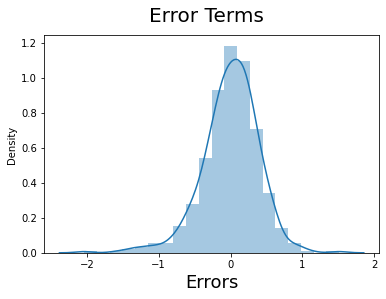

In [944]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

**Insights**

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# Step 7: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, let's make predictions using the final model.

### Applying the scaling on the test sets

In [945]:
# We have already used scaler() to all numeric variables in test dataset by using scaler.transform, 
# As we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.
bike_test.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,workingday,temp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1.304506,0.047244,-1.395126,0.799313
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1.612837,-0.276917,-0.985373,0.885522
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,-0.112907,1.284930,0.078536,-0.937183
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.525401,-1.464502,0.110155,0.151206
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.240076,-2.307309,1.276437,0.247678


In [946]:
bike_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr_2019,holiday_Yes,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.481818,0.036364,0.640909,0.094304,-0.084140,-0.044745,0.038600
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.500809,0.187620,0.480828,1.033465,1.020528,0.940739,0.977532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.175395,-2.666825,-2.143940,-2.075347
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.806655,-0.832398,-0.719418,-0.601712
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.091882,-0.170826,-0.122362,0.049859
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.968557,0.640461,0.482415,0.732603
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.980997,2.413579,2.868429,2.006239


### Dividing into X_test and y_test

In [947]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [948]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   season_Spring                 220 non-null    uint8  
 2   season_Summer                 220 non-null    uint8  
 3   season_Winter                 220 non-null    uint8  
 4   mnth_Dec                      220 non-null    uint8  
 5   mnth_Jan                      220 non-null    uint8  
 6   mnth_Jul                      220 non-null    uint8  
 7   mnth_Nov                      220 non-null    uint8  
 8   mnth_Sep                      220 non-null    uint8  
 9   weekday_Monday                220 non-null    uint8  
 10  weekday_Tuesday               220 non-null    uint8  
 11  weathersit_Light Snow & Rain  220 non-null    uint8  
 12  weathersit_Mist & Cloudy      220 non-null    uint8  
 13  yr_

In [950]:
X_test_lm = X_test_lm.drop(['const'],1)

In [951]:
# Making predictions using the final model (lr6)

y_pred = regressor.predict(X_test_lm)

# Model Evaluation

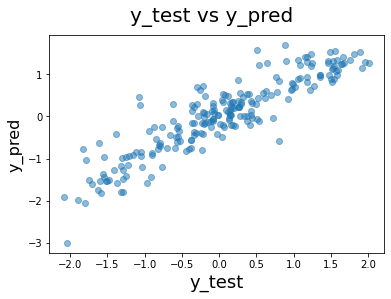

In [952]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [953]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8187298025708215

In [954]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.41524555750666403

# Final model coefficient values

const                          -0.336329

season_Spring                  -0.315839

season_Summer                   0.159406

season_Winter                   0.401876

mnth_Dec                       -0.195464

mnth_Jan                       -0.222778

mnth_Jul                       -0.203595

mnth_Nov                       -0.181189

mnth_Sep                        0.308550

weekday_Monday                 -0.117096

weekday_Tuesday                -0.141594

weathersit_Light Snow & Rain   -1.316081

weathersit_Mist & Cloudy       -0.361891

yr_2019                         1.045673

holiday_Yes                    -0.418316

temp                            0.439012

windspeed                      -0.116245

# Final equation
The equation of best fitted surface based on model:

**cnt = -0.336329 + (*yr_2019* × 1.045673) - (*season_Spring* × 0.315839) + (*temp* × 0.439012) − (*windspeed* × 0.116245) + (*season_Summer* × 0.159406) + (*season_Winter* × 0.401876) + (*mnth_Sep* × 0.308550) - (*weekday_Monday* × 0.117096) − (*weathersit_Light Snow & Rain* × 1.316081) − (*weathersit_Mist & Cloudy* × 0.361891) - (*season_Spring* × 0.315839) - (*mnth_Dec* × 0.195464) - (*mnth_Jan* × 0.222778) - (*mnth_Jul* × 0.203595) - (*mnth_Nov* × 0.181189) - (*weekday_Tuesday* × 0.141594) - (*holiday_Yes* × 0.418316).**

All the positive coefficients like temp , yr indicate that an increase in these values will lead to an increase in the value of cnt.

All the negative coefficients indicate that an increase in these values will lead to an decrease in the value of cnt.

- yr_2019 is the most significant with the largest coefficient.
- Followed by temp.
- Bike rentals is more for the month of september
- The rentals reduce during holidays

**This indicates that the bike rentals is majorly affected by temperature,season and month.**

# Final Result Comparison
Training:

**R^2 : 0.843**

**Adjusted R^2 : 0.838**

Testing: 

**R2_score : 0.8187**
